### Overview

Every streaming content has its own viewers and each content has it's rating. Viewers leave some good ratings for the content if they like it. But where does it apply? Viewers can spend hours scrolling through hundreds, sometimes thousands of anime's never finding an content they like. Business need to be provided suggestions based on their likes and needs in order to create a better streaming environment that boosts revenue and increases the time spent on a website.

They also appear in places like streaming apps (aka Netflix and Hulu) to help you select a TV show or movie to watch next and on journalism/media websites like Medium to suggest other articles you may like to read, among many other uses. Obviously many e-retailers like Amazon have already been using recommender algorithms for quite some time, but many smaller or newer sites are still in need. There are different varieties of recommenders that base their predictions on different features. This helps with business decisions. Overall, the dataset reflect anime ratings.


In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab

In [14]:
anime_data = pd.read_csv(r'D:\Anime Recommendation\anime.csv')

rating_data = pd.read_csv(r'D:\Anime Recommendation\rating.csv')

print(anime_data.columns)

anime_data.name.nunique()

anime_data.head()

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [15]:
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [11]:
print(rating_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [12]:
print(anime_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


So in the pervious steps, I was only sorting the data to understand what I am working with. So we know they share anime_id and rating.

the objective is:

- Of all anime having at least 1000 ratings, which anime has the maximum average
rating? 
- How many anime with at least 1000 ratings have an average rating greater than 9?
- Which is the most watched anime i.e. the anime rated by most number of users?
- What are the top three recommendations for the user with user_id 8086?
- List top three users whom you would recommend the anime with anime_id 4935?

In [19]:
## we use suffixes to name the columns as it prints the total rating as rating_x
## and the indivual user rating as rating_y. This is just to determine 
## so I do not miss it up later on and easy to understand to other readers

anime_fulldata = pd.merge(anime_data , rating_data, on = 'anime_id', suffixes = ['', '_user'])

anime_fulldata = anime_fulldata.rename(columns = {'name': 'anime_title', 'rating_user': 'rating_user'})

anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


We have successfully merged(fused) the csv's and made it powerful.

In [54]:
## Error pops up tuple indices must be integers or slices, not list

combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])

anime_rating_count = (combine_anime_rating.groupby(by = ['anime_title'])['rating_user'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['anime_title', 'rating_user']])

print(anime_rating_count.columns)

Index(['anime_title', 'rating_user'], dtype='object')


[Text(0, 0, 'Death Note'),
 Text(1, 0, 'Sword Art Online'),
 Text(2, 0, 'Shingeki no Kyojin'),
 Text(3, 0, 'Code Geass: Hangyaku no Lelouch'),
 Text(4, 0, 'Elfen Lied'),
 Text(5, 0, 'Angel Beats!'),
 Text(6, 0, 'Naruto'),
 Text(7, 0, 'Fullmetal Alchemist'),
 Text(8, 0, 'Fullmetal Alchemist: Brotherhood'),
 Text(9, 0, 'Toradora!')]

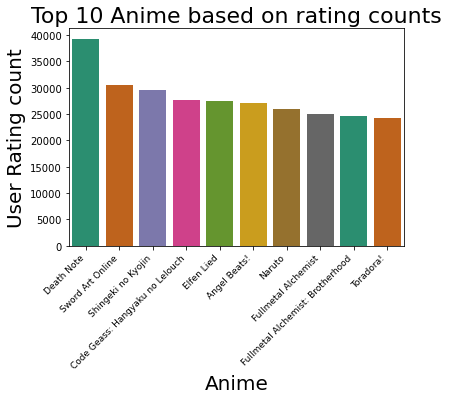

In [60]:
## Discovering top 10 anime

top10_anime = anime_rating_count[['anime_title','rating_user']].sort_values(by = 'rating_user', ascending = False).head(10)

ax = sns.barplot(x="anime_title", y="rating_user", data=top10_animerating, palette="Dark2")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

## for text not to overlap eachother

ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, rotation = 45, ha = "right")

### Distribution of ratings

Text(0.5, 1.0, 'Rating of users')

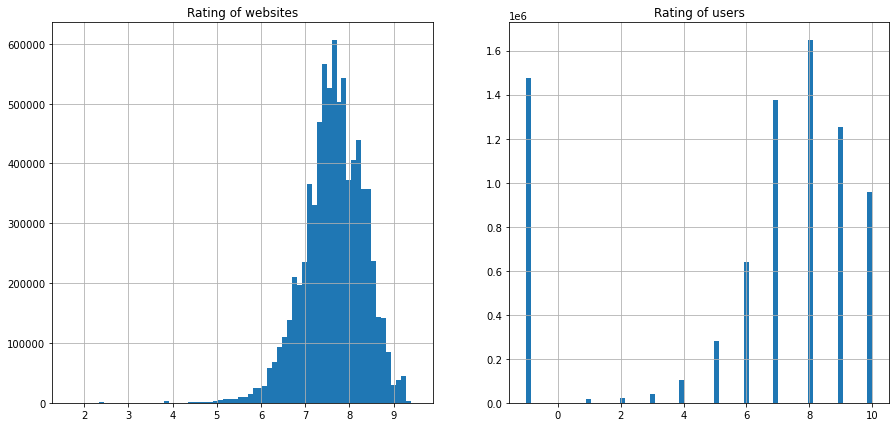

In [65]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['rating_user'].hist(bins=70)
plt.title("Rating of users")

As shown in the distrbution chart most if reviews from websites and users ranges highly between 6.5 to 8.5 and 7 to 10 respectively. The negative value in rating is an outlier in rating of users which can be made into NaN.<br>
<br>
the websites ratings are coming from anime data while user rating is coming from rating.

### Finding where the popular anime are coming from 

In [141]:
## https://plotly.com/python/pie-charts/

import plotly.graph_objects as go

labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

- 67.6% of the anime's were aired on TV followed by 13.5% through Movie
- 10.2% of anime's are streamed as OVA which is greater than ONA(1.18%)

#### Preparing the steps before Anime recommendation  

Hear it gets very technical and mathematical, I am a bit in expreience in this area so I seeked online help. Building matrices, Term Frequenct (TF) and Inverse Document Frequency (IDF), and lastly giving recommendation algorithm 

In [144]:
## Dealing with nun Values in this case -1s.

anime_feature=anime_fulldata.copy()

anime_feature["rating_user"].replace({-1: np.nan}, inplace=True)

anime_feature.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [145]:

anime_feature = anime_feature.dropna(axis = 0, how ='any')

anime_feature.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
rating_user    0
dtype: int64

In [146]:
## filtering user_ids

anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
3939        1
17218       1
11981       1
60619       1
69190       1
Name: user_id, Length: 69600, dtype: int64

In [149]:
## Pivot

anime_pivot = anime_feature.pivot_table(index='anime_title', columns='user_id', values='rating_user').fillna(0)

anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Collaborative Filtering

So we need to get rid of the quotations from each titles as shown above. I noticed the quotation since the begging of my analysis, so I should have done it from the beginning 

In [150]:
## Filtering Anime titles

import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

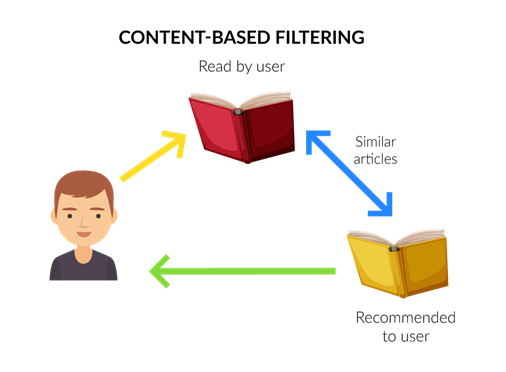 <br>
Also Copied this from Pathairush

Filtering user taste of anime and share their taste with one to another based on 
the anime they regulary watch or they have wathced. <br>

###### From: Pathairush. Kaggle
Findings: <br>

Using Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [153]:
## Getting random anime and find a fir recommendation

from scipy.sparse import csr_matrix as csr
from sklearn.neighbors import NearestNeighbors

anime_matrix = csr(anime_pivot.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [155]:
query_index = np.random.choice(anime_pivot.shape[0])

print(query_index)

distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

5863


In [156]:
for i in range(0, len(distances.flatten())):
    
    if i == 0:
        
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Murder Princess:

1: Shingetsutan Tsukihime, with distance of 0.6501060794569538:
2: Full Metal Panic!, with distance of 0.6612741771348966:
3: Claymore, with distance of 0.6618608986872218:
4: Elfen Lied, with distance of 0.6713824119948835:
5: Chrno Crusade, with distance of 0.6748868185232545:


In [159]:
## TF-IDF 
## Filling NaNs with empty string

from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')


anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

tfv_matrix.shape

(12294, 1554)

In [160]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [161]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

#### Figuring out how to find the recommended anime function

- Common thoughts:
    - original title
    - similar rating
    - sort title DESC
    - top 10 anime similar rating from movies and episodes
    - movie index
    - Show top 10 similar movies

In [162]:
def give_rec(title, sig=sig):
    
    idx = indices[title]

    sig_scores = list(enumerate(sig[idx]))

    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    sig_scores = sig_scores[1:11]

    anime_indices = [i[0] for i in sig_scores]

    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})

###### Now the big reveal give an anime title and see the similarities of the top 10 recommendations 

In [163]:
give_rec('Naruto: Shippuuden')

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


In [164]:
give_rec('Dragon Ball Z')

,Anime name,Rating
0,Dragon Ball Kai (2014),8.01
1,Dragon Ball Kai,7.95
2,Dragon Ball Z Movie 15: Fukkatsu no F,7.55
3,Dragon Ball Super,7.40
4,Dragon Ball Z: Summer Vacation Special,7.05
5,Dragon Ball Z: Atsumare! Gokuu World,6.76
6,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,6.75
7,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,6.28
8,Dragon Ball,8.16
9,Dragon Ball Z Movie 14: Kami to Kami,7.62


In [165]:
give_rec('Hunter x Hunter')

,Anime name,Rating
0,Hunter x Hunter,8.48
1,Hunter x Hunter OVA,8.41
2,Hunter x Hunter: Greed Island Final,8.41
3,Hunter x Hunter: Greed Island,8.33
4,Hunter x Hunter Movie: Phantom Rouge,7.39
5,Hunter x Hunter Pilot,7.37
6,Hunter x Hunter Movie: The Last Mission,7.35
7,Nano Invaders,7.08
8,Taegeugsonyeon Huin Dogsuli,3.79
9,Noragami Aragoto OVA,8.12


In [172]:
give_rec('Digimon Tamers')

,Anime name,Rating
0,Digimon Savers,7.10
1,Digimon Frontier: Ornismon Fukkatsu!!,7.02
2,One Piece Film: Strong World,8.42
3,One Piece Film: Z,8.39
4,One Piece Film: Gold,8.32
5,One Piece: Heart of Gold,7.75
6,Digimon Frontier,7.25
7,Bleach: The Sealed Sword Frenzy,7.05
8,Naruto Movie 2: Dai Gekitotsu! Maboroshi no Ch...,6.99
9,Arashi no Yoru ni,7.90


### In conclusion:
We needed to get the rating and merge the data. Merging the data will give more information. The construct of pivot table to calculate the distance between all users and pick the most similar user recommendations. Then compute the recommendation method based on the rating and similarities based on genre. This can work on Crunchyroll and Animelab just like Netflix and Hulu where they give recommendation after you finish the series or rewatch list. I am a Crunchyroll user and the genre recommendation is not as good, probably because of lack of anime based on country region. So this is to improve website and apps with anime series and movies.
    
**Note: I personally struggled with creative thinking on finding the similarity between animes. The coding method is something I am familiar with such as building Matrices and Pivot but some steps are very new like TF-TDF, so I had to search Kaggle.**